# Surveillance Firefighter YoloV8 Nano

* Fire and smoke dataset https://universe.roboflow.com/veli-t/firesmokedetection-5w49j/dataset/3
* YoloV8 documentation https://docs.ultralytics.com/models/yolov8/
* Trained model https://www.kaggle.com/models/bahiskaraananda/sfy8-32/pyTorch/yolov8n-200e-fs

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [2]:
# Install necessary packages
!pip install ultralytics==8.0.196
from IPython import display
display.clear_output()

In [3]:
# Import Ultralytics and check
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6277.7/8062.4 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image
from pathlib import Path

In [5]:
# Import Roboflow (adjust API key)
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("roboflow_key")

In [6]:
!pip install roboflow
from roboflow import Roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 37.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 101.5 MB/s eta 0:00:0000:01
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
ERROR: pip's dependency resolver does not currently take into accoun

In [7]:
# Define Roboflow Project and Dataset
rf = Roboflow(api_key=secret_value_0)
project = rf.workspace("veli-t").project("firesmokedetection-5w49j")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FireSmokeDetection-3 in yolov8:: 100%|██████████| 13400/13400 [00:01<00:00, 8456.76it/s] 


In [8]:
data_yaml_path = f"{dataset.location}/data.yaml"
print(data_yaml_path)

/kaggle/working/FireSmokeDetection-3/data.yaml


In [9]:
with open(data_yaml_path, "r") as file:
    print(file.read())

names:
- Fire
- fire
- smoke
nc: 3
roboflow:
  license: CC BY 4.0
  project: firesmokedetection-5w49j
  url: https://universe.roboflow.com/veli-t/firesmokedetection-5w49j/dataset/3
  version: 3
  workspace: veli-t
test: test/images
train: train/images
val: valid/images



In [10]:
# Rewrite the YAML file
custom_yaml = f"""
train: {dataset.location}/train/images
val: {dataset.location}/valid/images
test: {dataset.location}/test/images

nc: 82
names:
"""

# Add 80 COCO class names (hardcoded)
coco_classes = [
  'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
  'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat',
  'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
  'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
  'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork',
  'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog',
  'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv',
  'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
  'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Append the classes
for i, cls in enumerate(coco_classes):
    custom_yaml += f"  {i}: {cls}\n"

# Add fire and smoke
custom_yaml += "  80: fire\n"
custom_yaml += "  81: smoke\n"

# Save the updated YAML
with open(data_yaml_path, "w") as f:
    f.write(custom_yaml)

In [11]:
with open(data_yaml_path, "r") as file:
    print(file.read())


train: /kaggle/working/FireSmokeDetection-3/train/images
val: /kaggle/working/FireSmokeDetection-3/valid/images
test: /kaggle/working/FireSmokeDetection-3/test/images

nc: 82
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  27: tie
  28: suitcase
  29: frisbee
  30: skis
  31: snowboard
  32: sports ball
  33: kite
  34: baseball bat
  35: baseball glove
  36: skateboard
  37: surfboard
  38: tennis racket
  39: bottle
  40: wine glass
  41: cup
  42: fork
  43: knife
  44: spoon
  45: bowl
  46: banana
  47: apple
  48: sandwich
  49: orange
  50: broccoli
  51: carrot
  52: hot dog
  53: pizza
  54: donut
  55: cake
  56: chair
  57: couch
  58: potted plant
  59: bed
  60: di

In [12]:
# Define dataset directory and convert to Path object
DATASET_DIR = Path("/kaggle/working/FireSmokeDetection-3")
LABEL_DIRS = [DATASET_DIR / split / "labels" for split in ["train", "valid", "test"]]

# Print the label directories to ensure they are correct
print("Label directories detected:")
for dir in LABEL_DIRS:
    print(dir)

Label directories detected:
/kaggle/working/FireSmokeDetection-3/train/labels
/kaggle/working/FireSmokeDetection-3/valid/labels
/kaggle/working/FireSmokeDetection-3/test/labels


In [13]:
import hashlib
# Relabel current datasets
LABEL_MAP = {
    0: 80,  # fire/Fire → 80
    1: 80,  # fire/Fire → 80
    2: 81   # smoke → 81
}

def clean_labels(label_dir):
    """ Clean and update label files by applying LABEL_MAP """
    updated_files = []
    for label_path in label_dir.glob("*.txt"):
        new_lines = []
        with open(label_path, "r") as file:
            for line in file:
                parts = line.strip().split()
                if not parts:
                    continue
                class_id = int(parts[0])

                if class_id in LABEL_MAP:
                    parts[0] = str(LABEL_MAP[class_id])
                    new_lines.append(" ".join(parts))
                
        if new_lines:
            with open(label_path, "w") as file:
                file.write("\n".join(new_lines))
            updated_files.append(label_path)
    return updated_files

def get_file_hash(file_path):
    """ Generate hash of the file content to compare before and after """
    hash_sha256 = hashlib.sha256()
    with open(file_path, "rb") as file:
        while chunk := file.read(4096):
            hash_sha256.update(chunk)
    return hash_sha256.hexdigest()

def check_labels_update(label_dir):
    label_files = list(label_dir.glob("*.txt"))
    file_hashes_before = {file: get_file_hash(file) for file in label_files}

    updated_files = clean_labels(label_dir)
    file_hashes_after = {file: get_file_hash(file) for file in label_files}
    changed_files = [
        file for file, hash_before in file_hashes_before.items()
        if hash_before != file_hashes_after[file]
    ]
    return changed_files

for dir in LABEL_DIRS:
    changed = check_labels_update(dir)
    if changed:
        print(f"The label files were updated")
    else:
        print(f"No changes detected in label files in {dir}.")

The label files were updated
The label files were updated
The label files were updated


In [14]:
# Train the model with extended head
!yolo task=detect mode=train model=yolov8n.pt data={data_yaml_path} epochs=200 patience=30 imgsz=640 plots=True

100%|██████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 78.9MB/s]
New https://pypi.org/project/ultralytics/8.3.111 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/FireSmokeDetection-3/data.yaml, epochs=200, patience=30, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

Displaying: R_curve.png


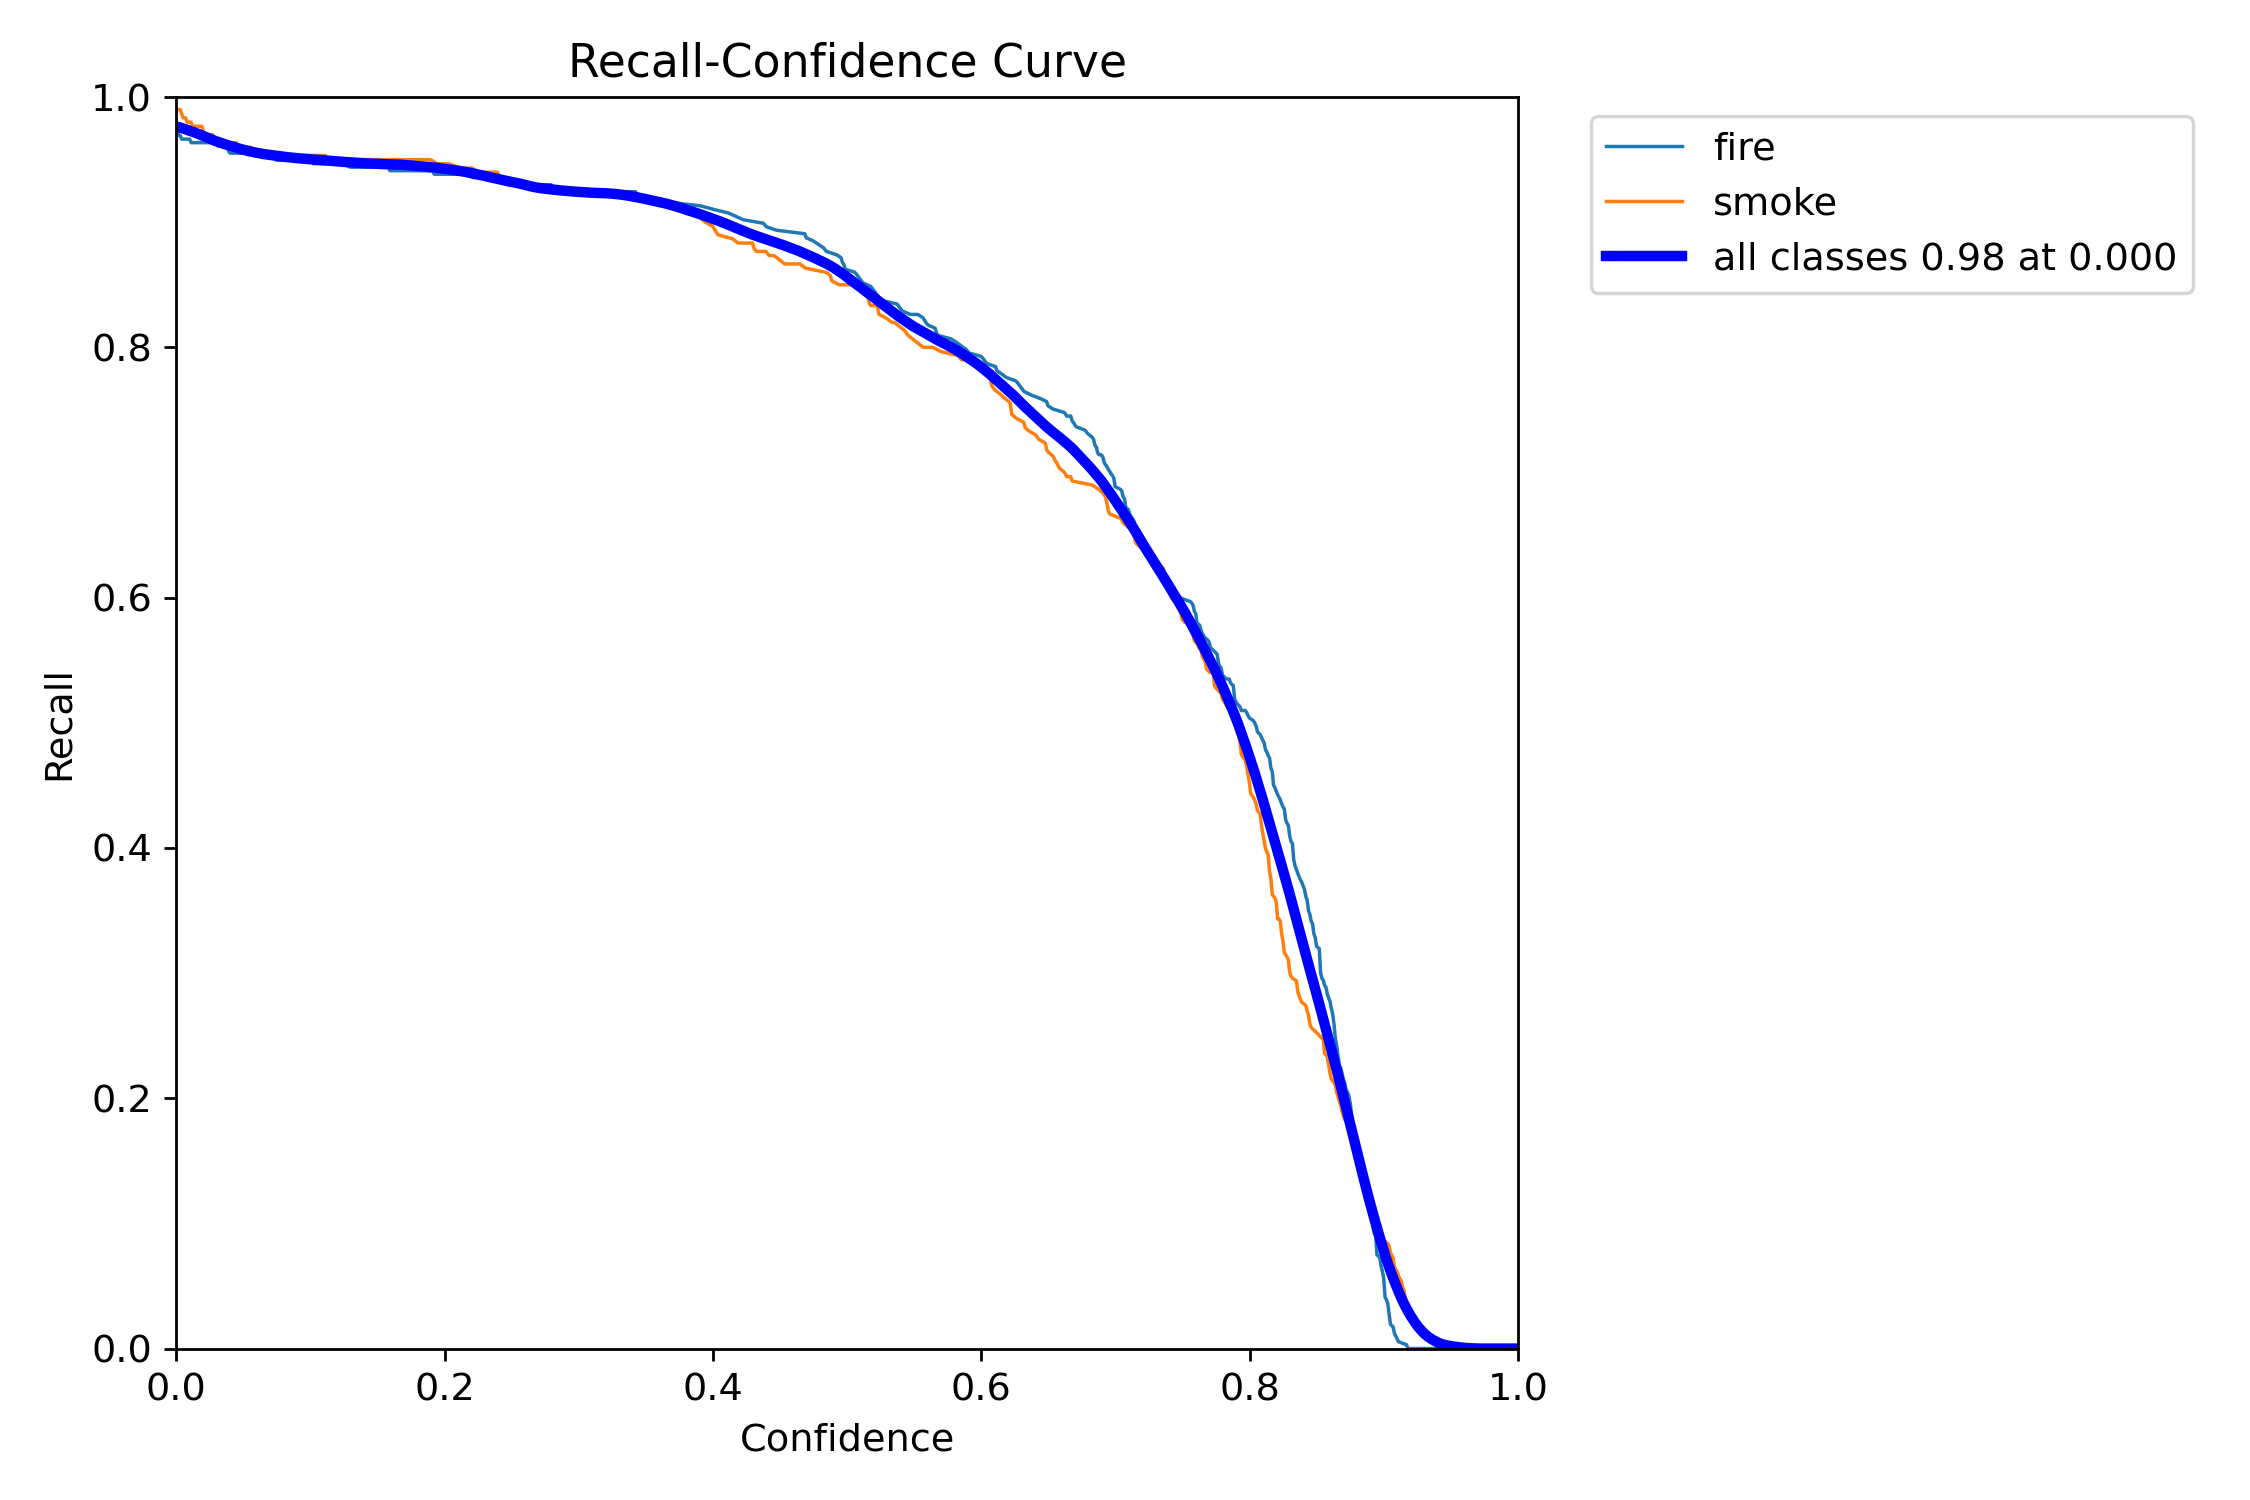

Displaying: F1_curve.png


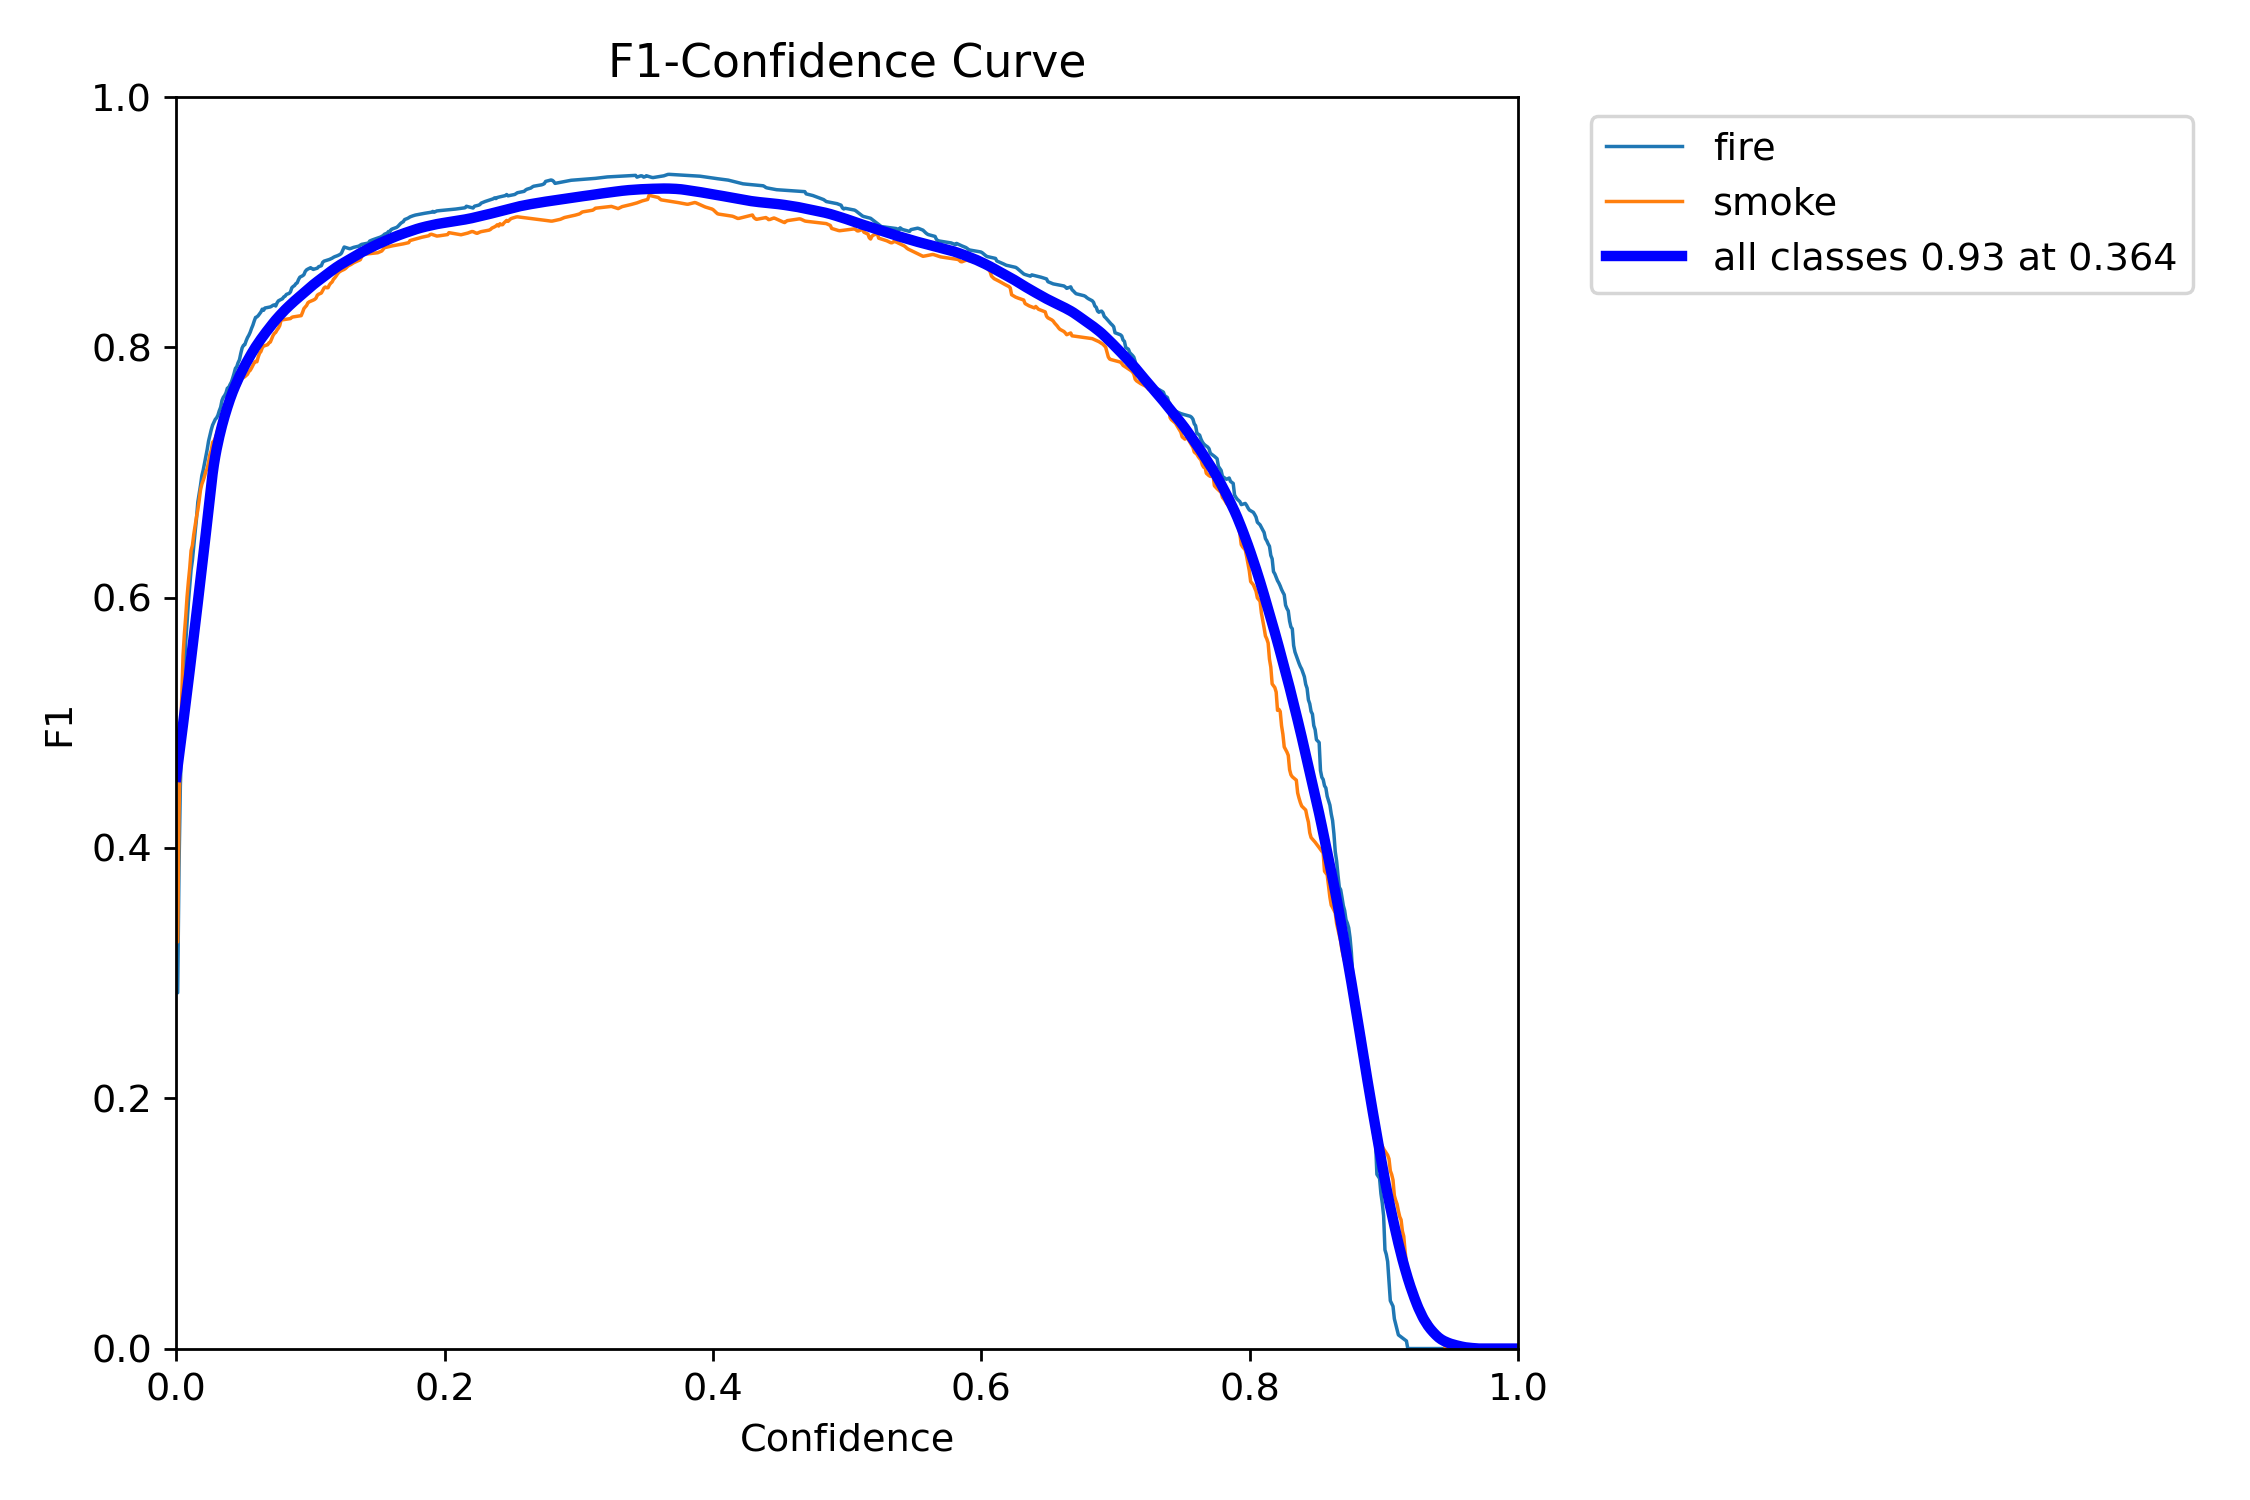

Displaying: PR_curve.png


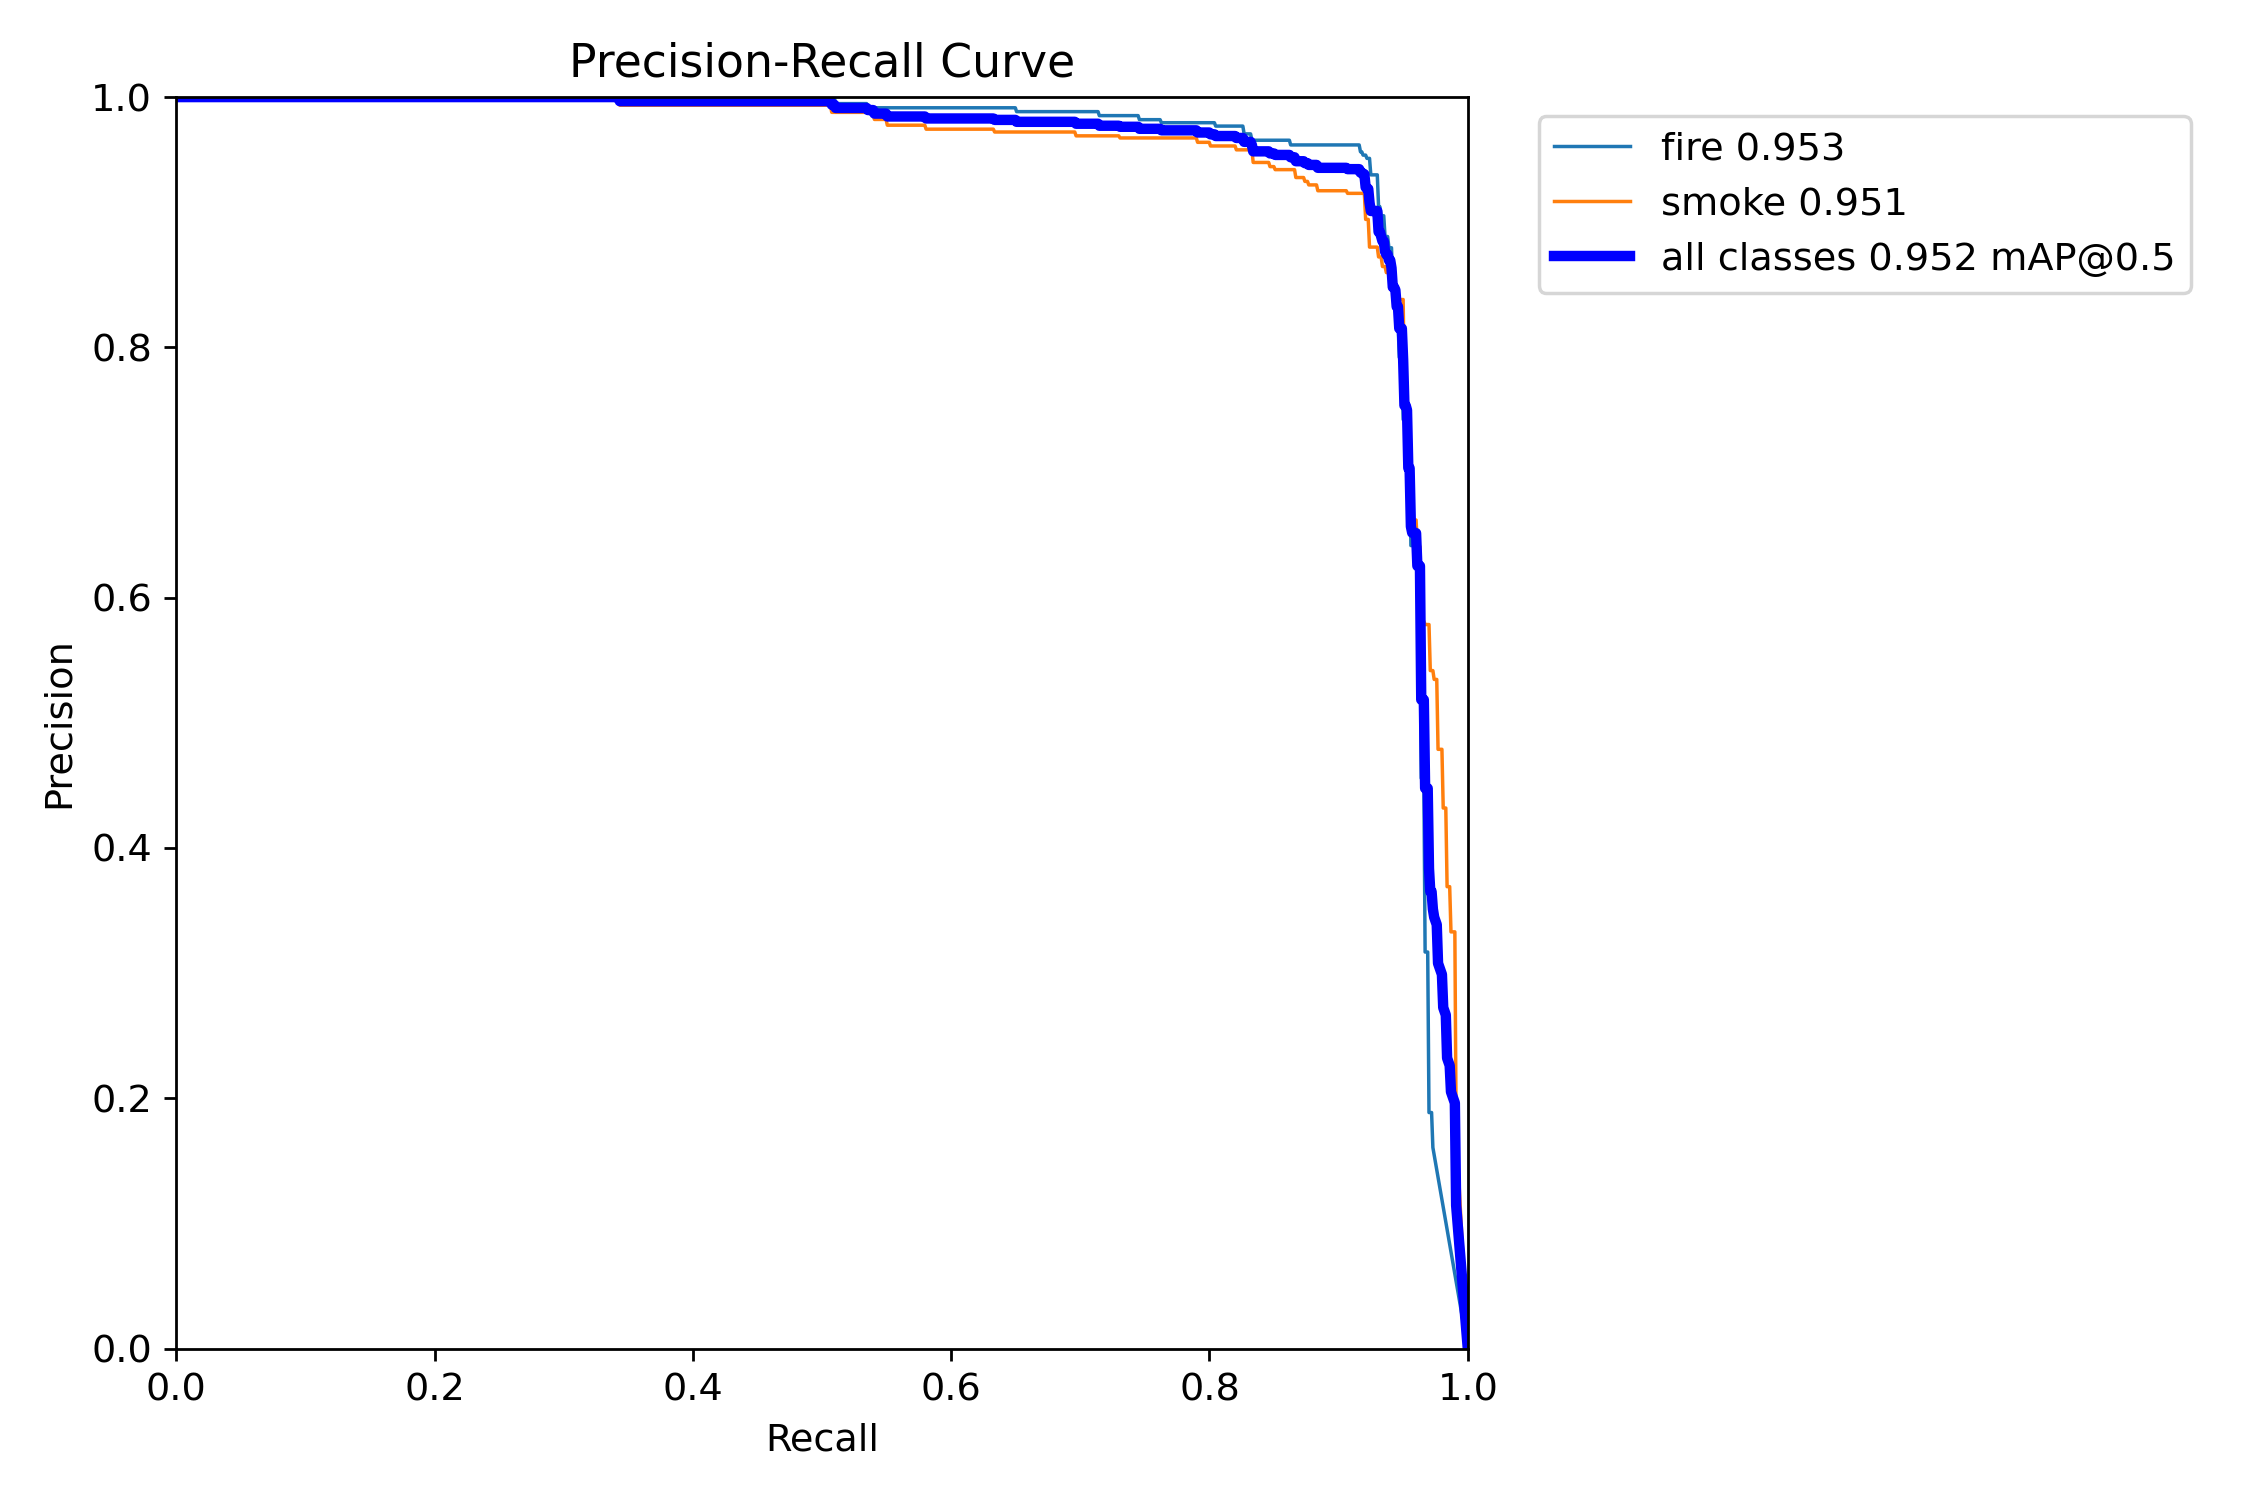

Displaying: confusion_matrix_normalized.png


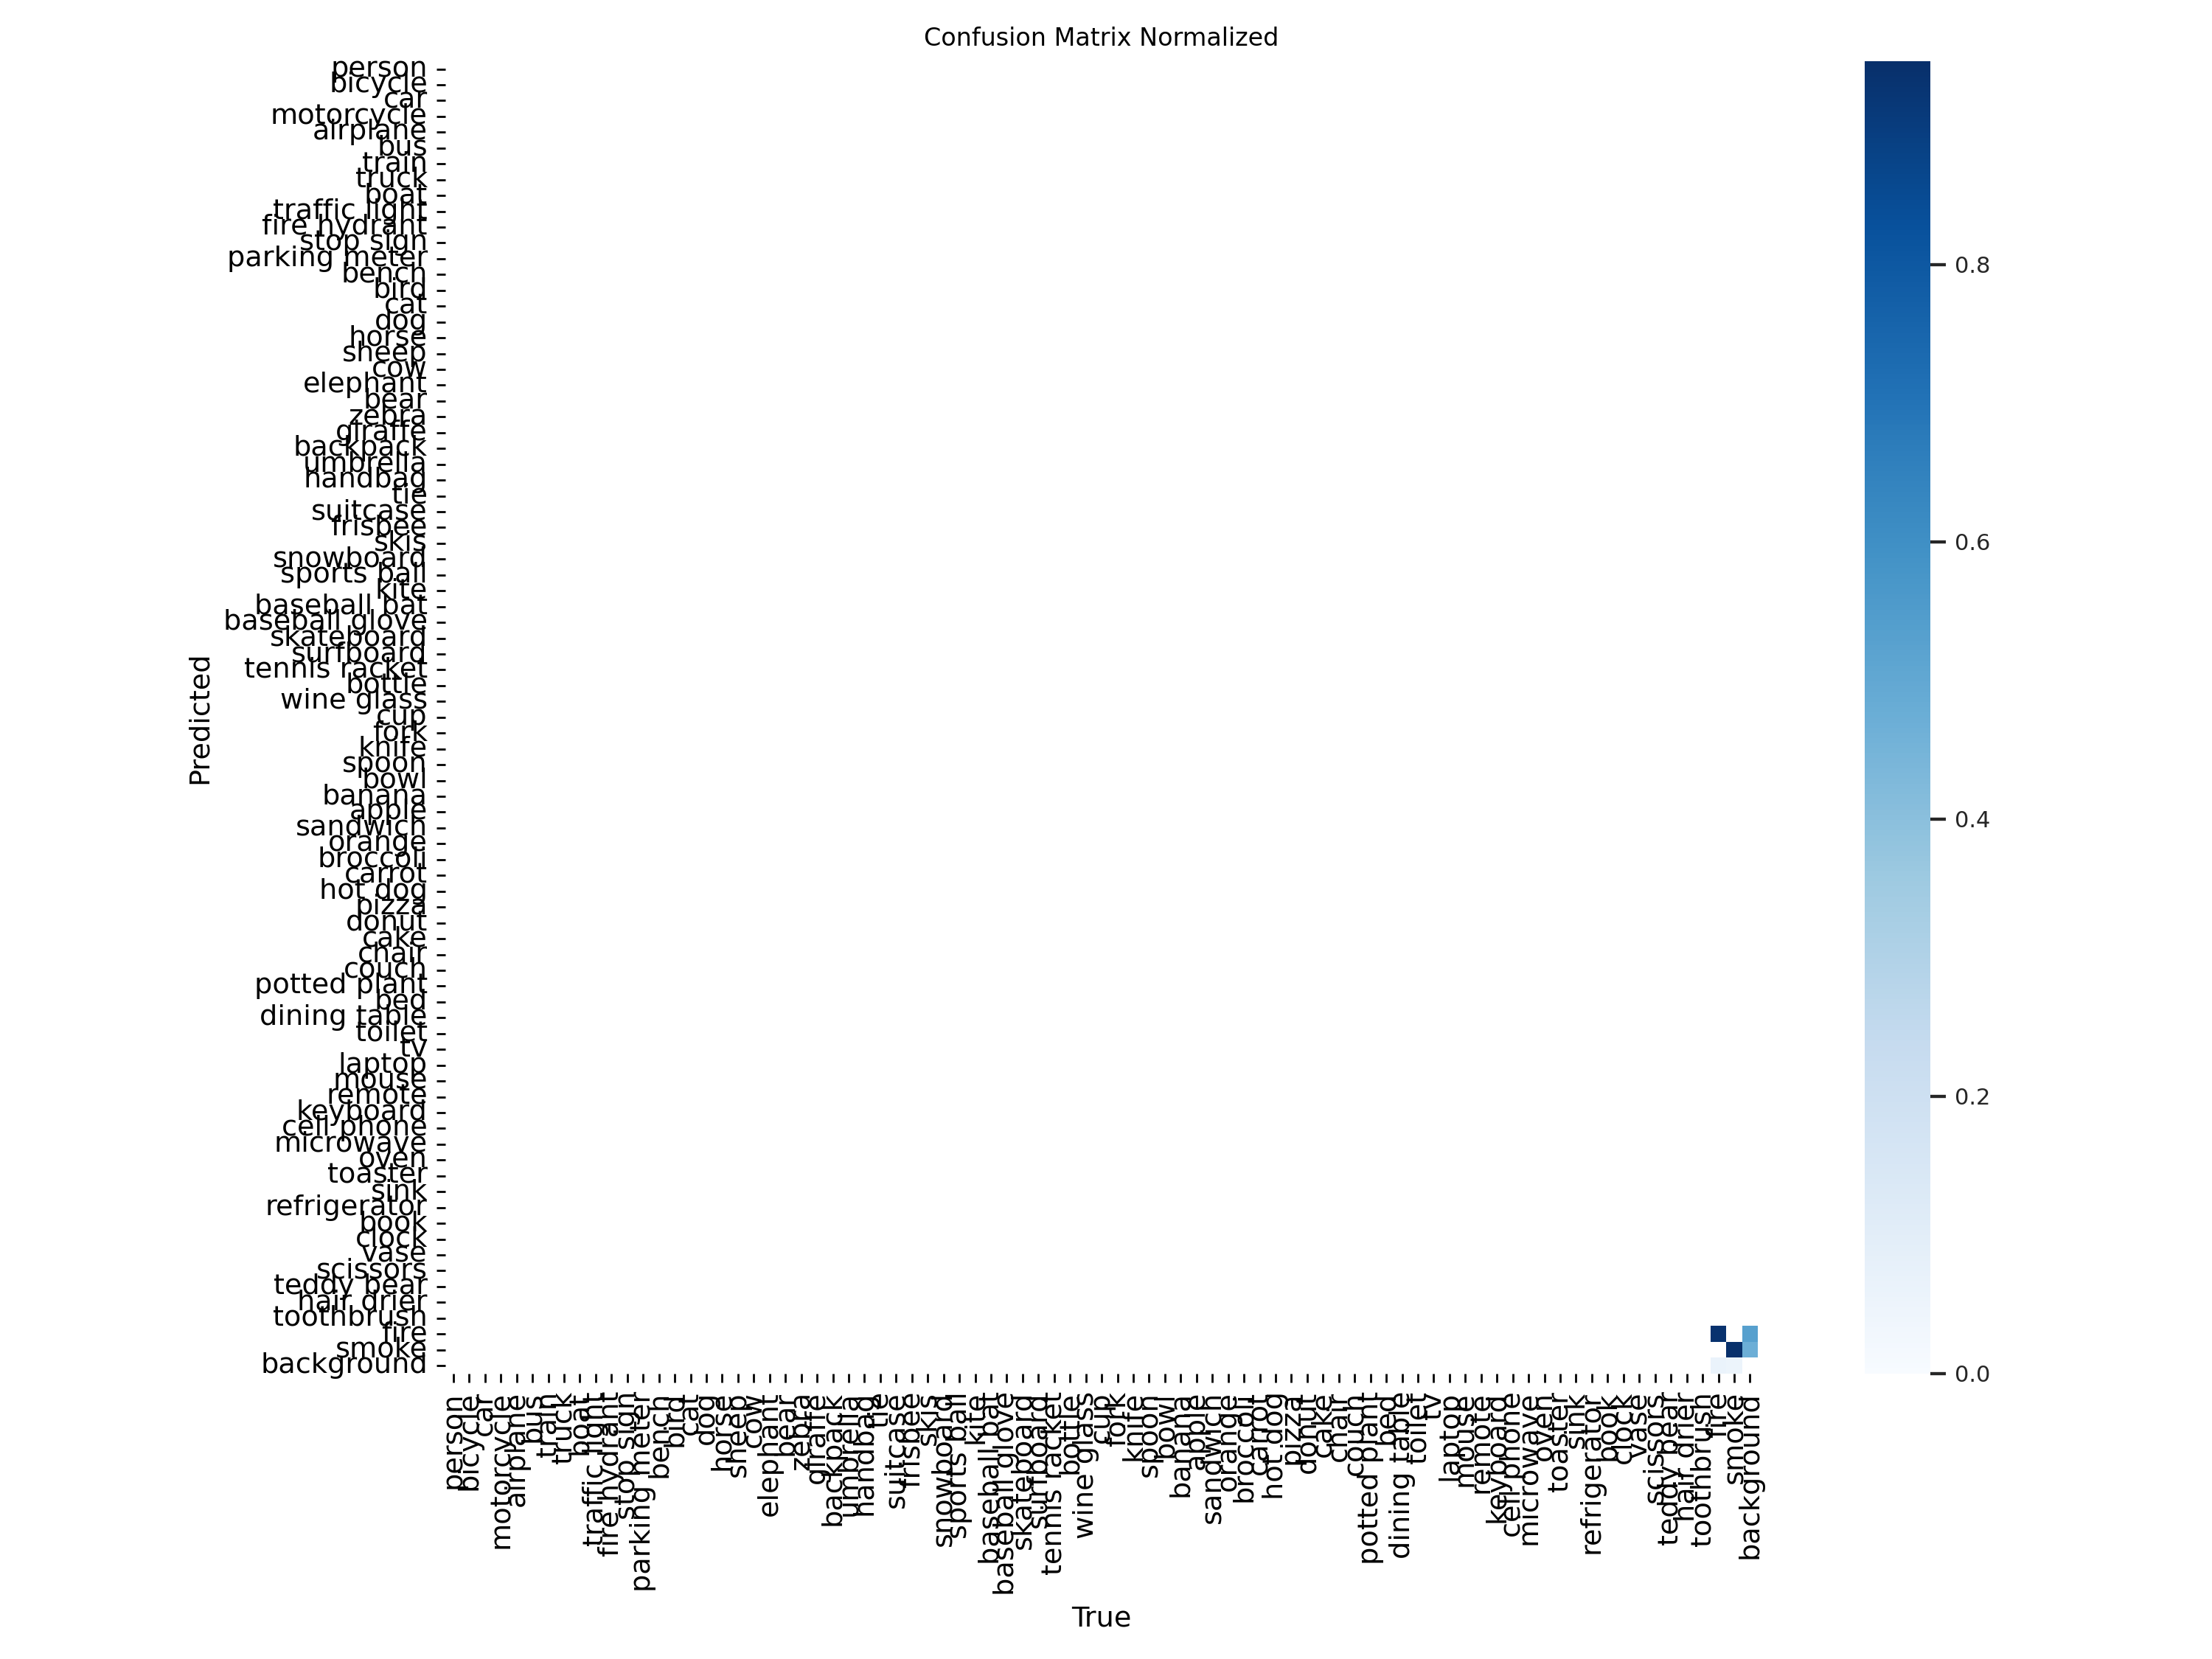

Displaying: P_curve.png


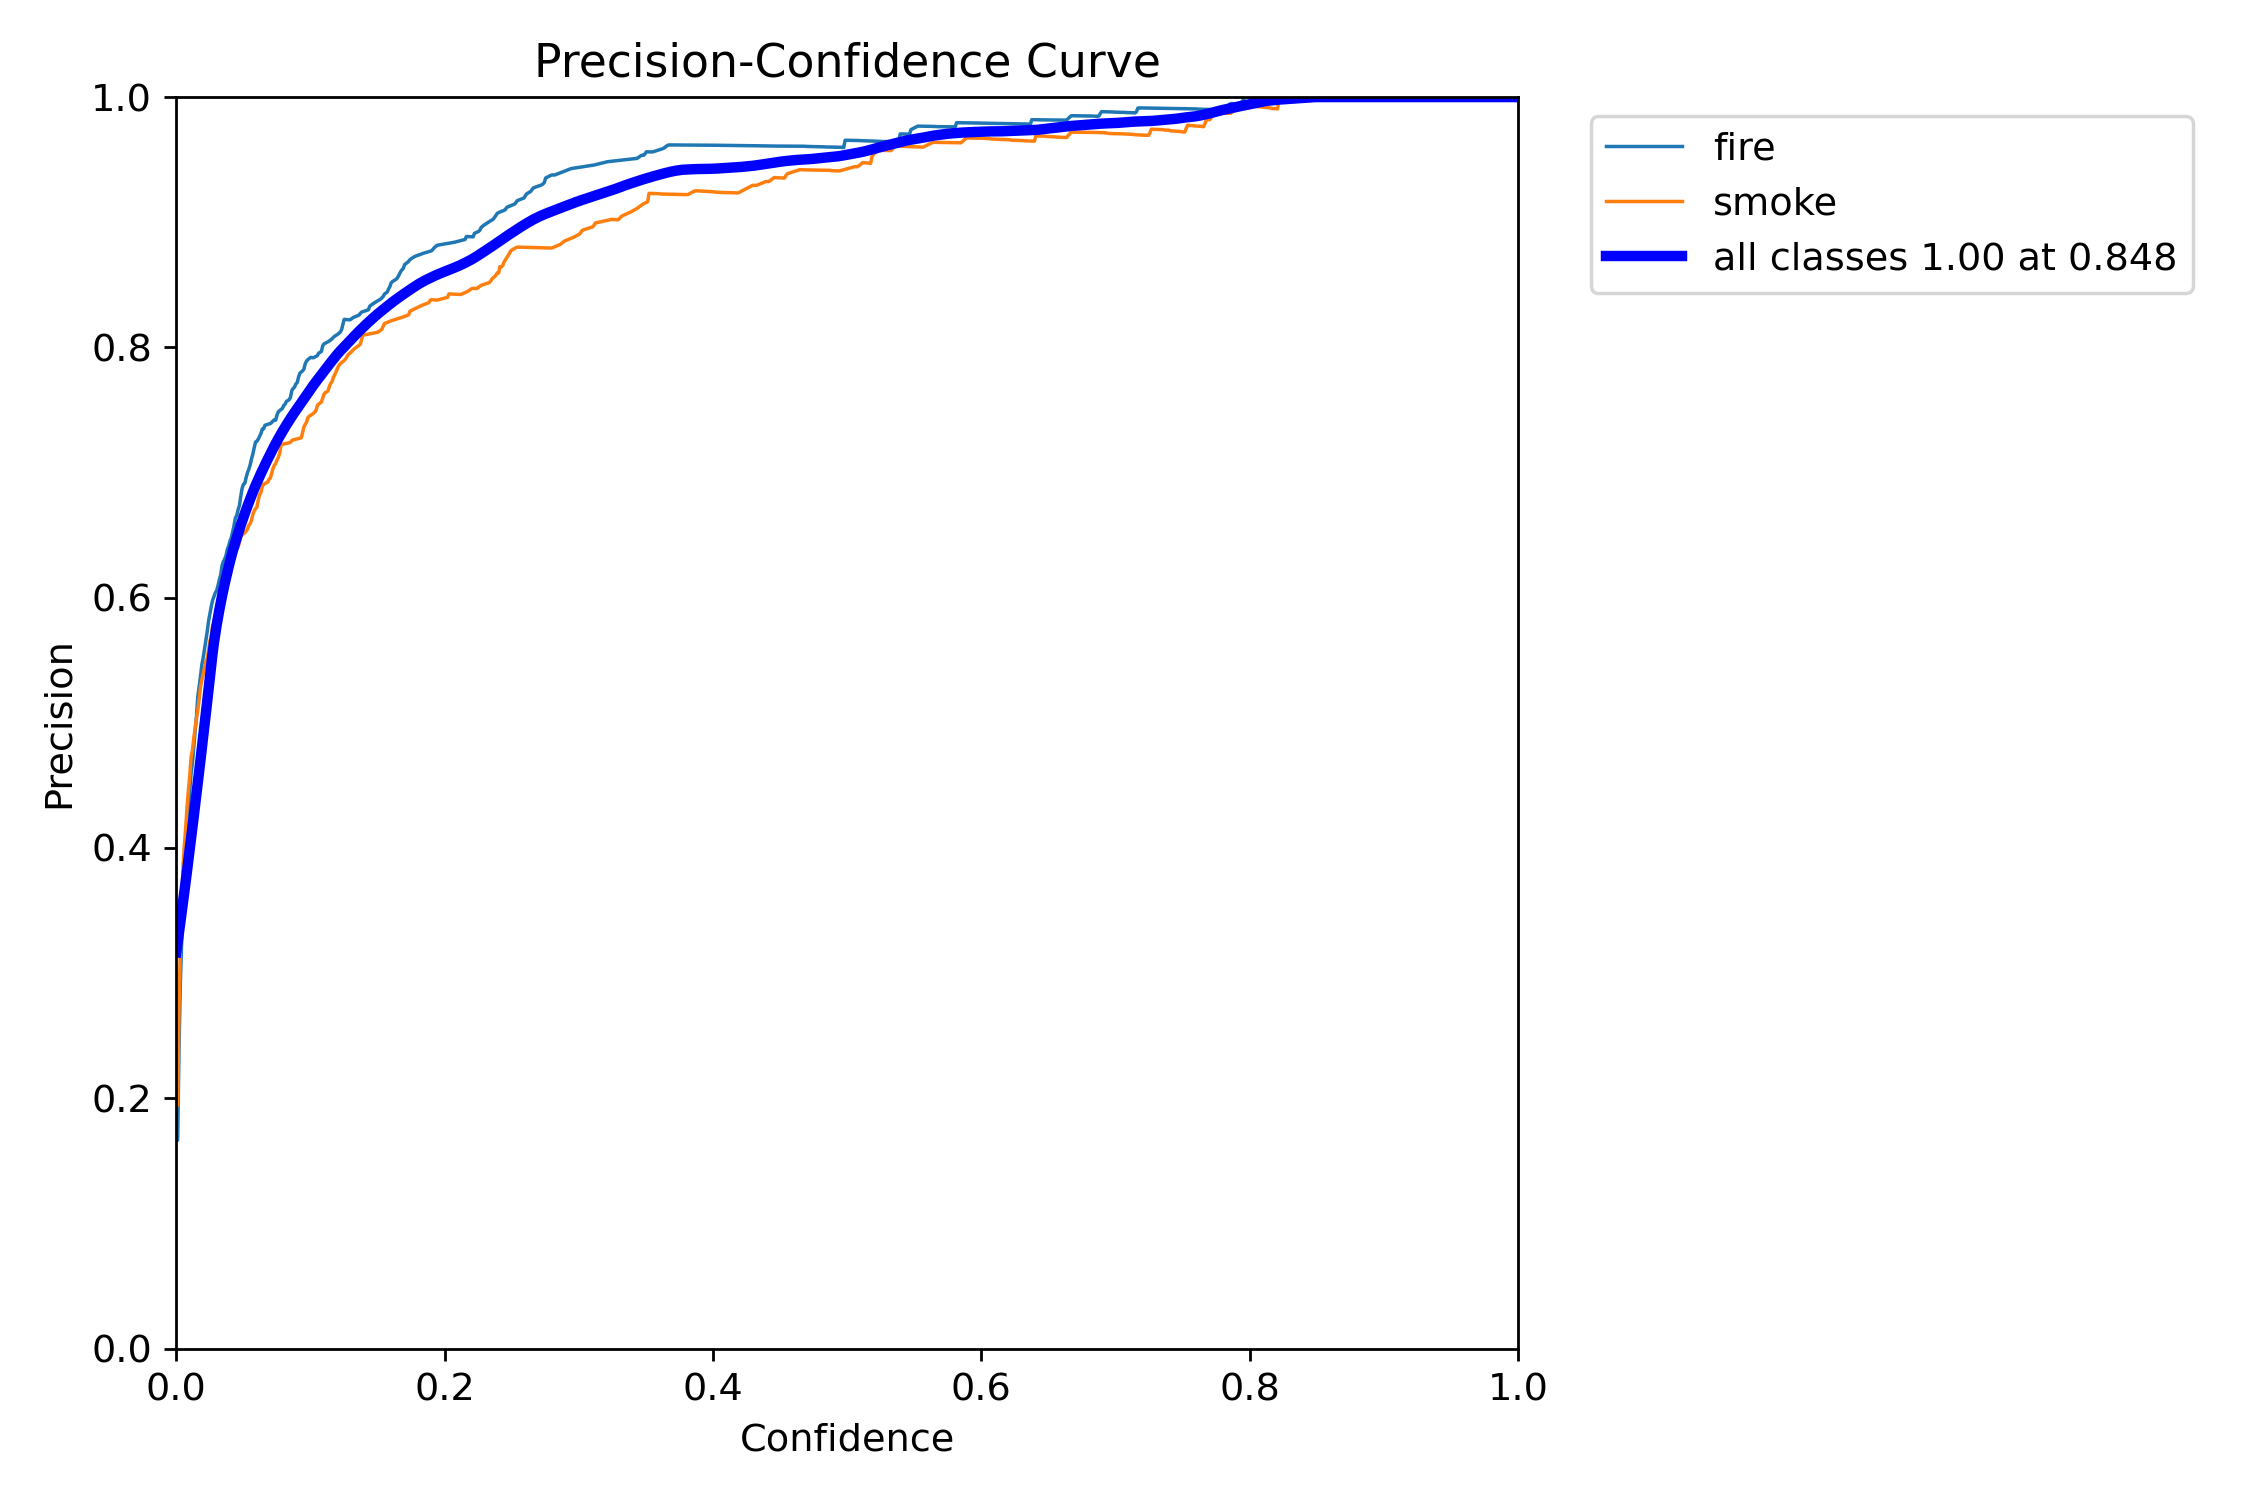

Displaying: confusion_matrix.png


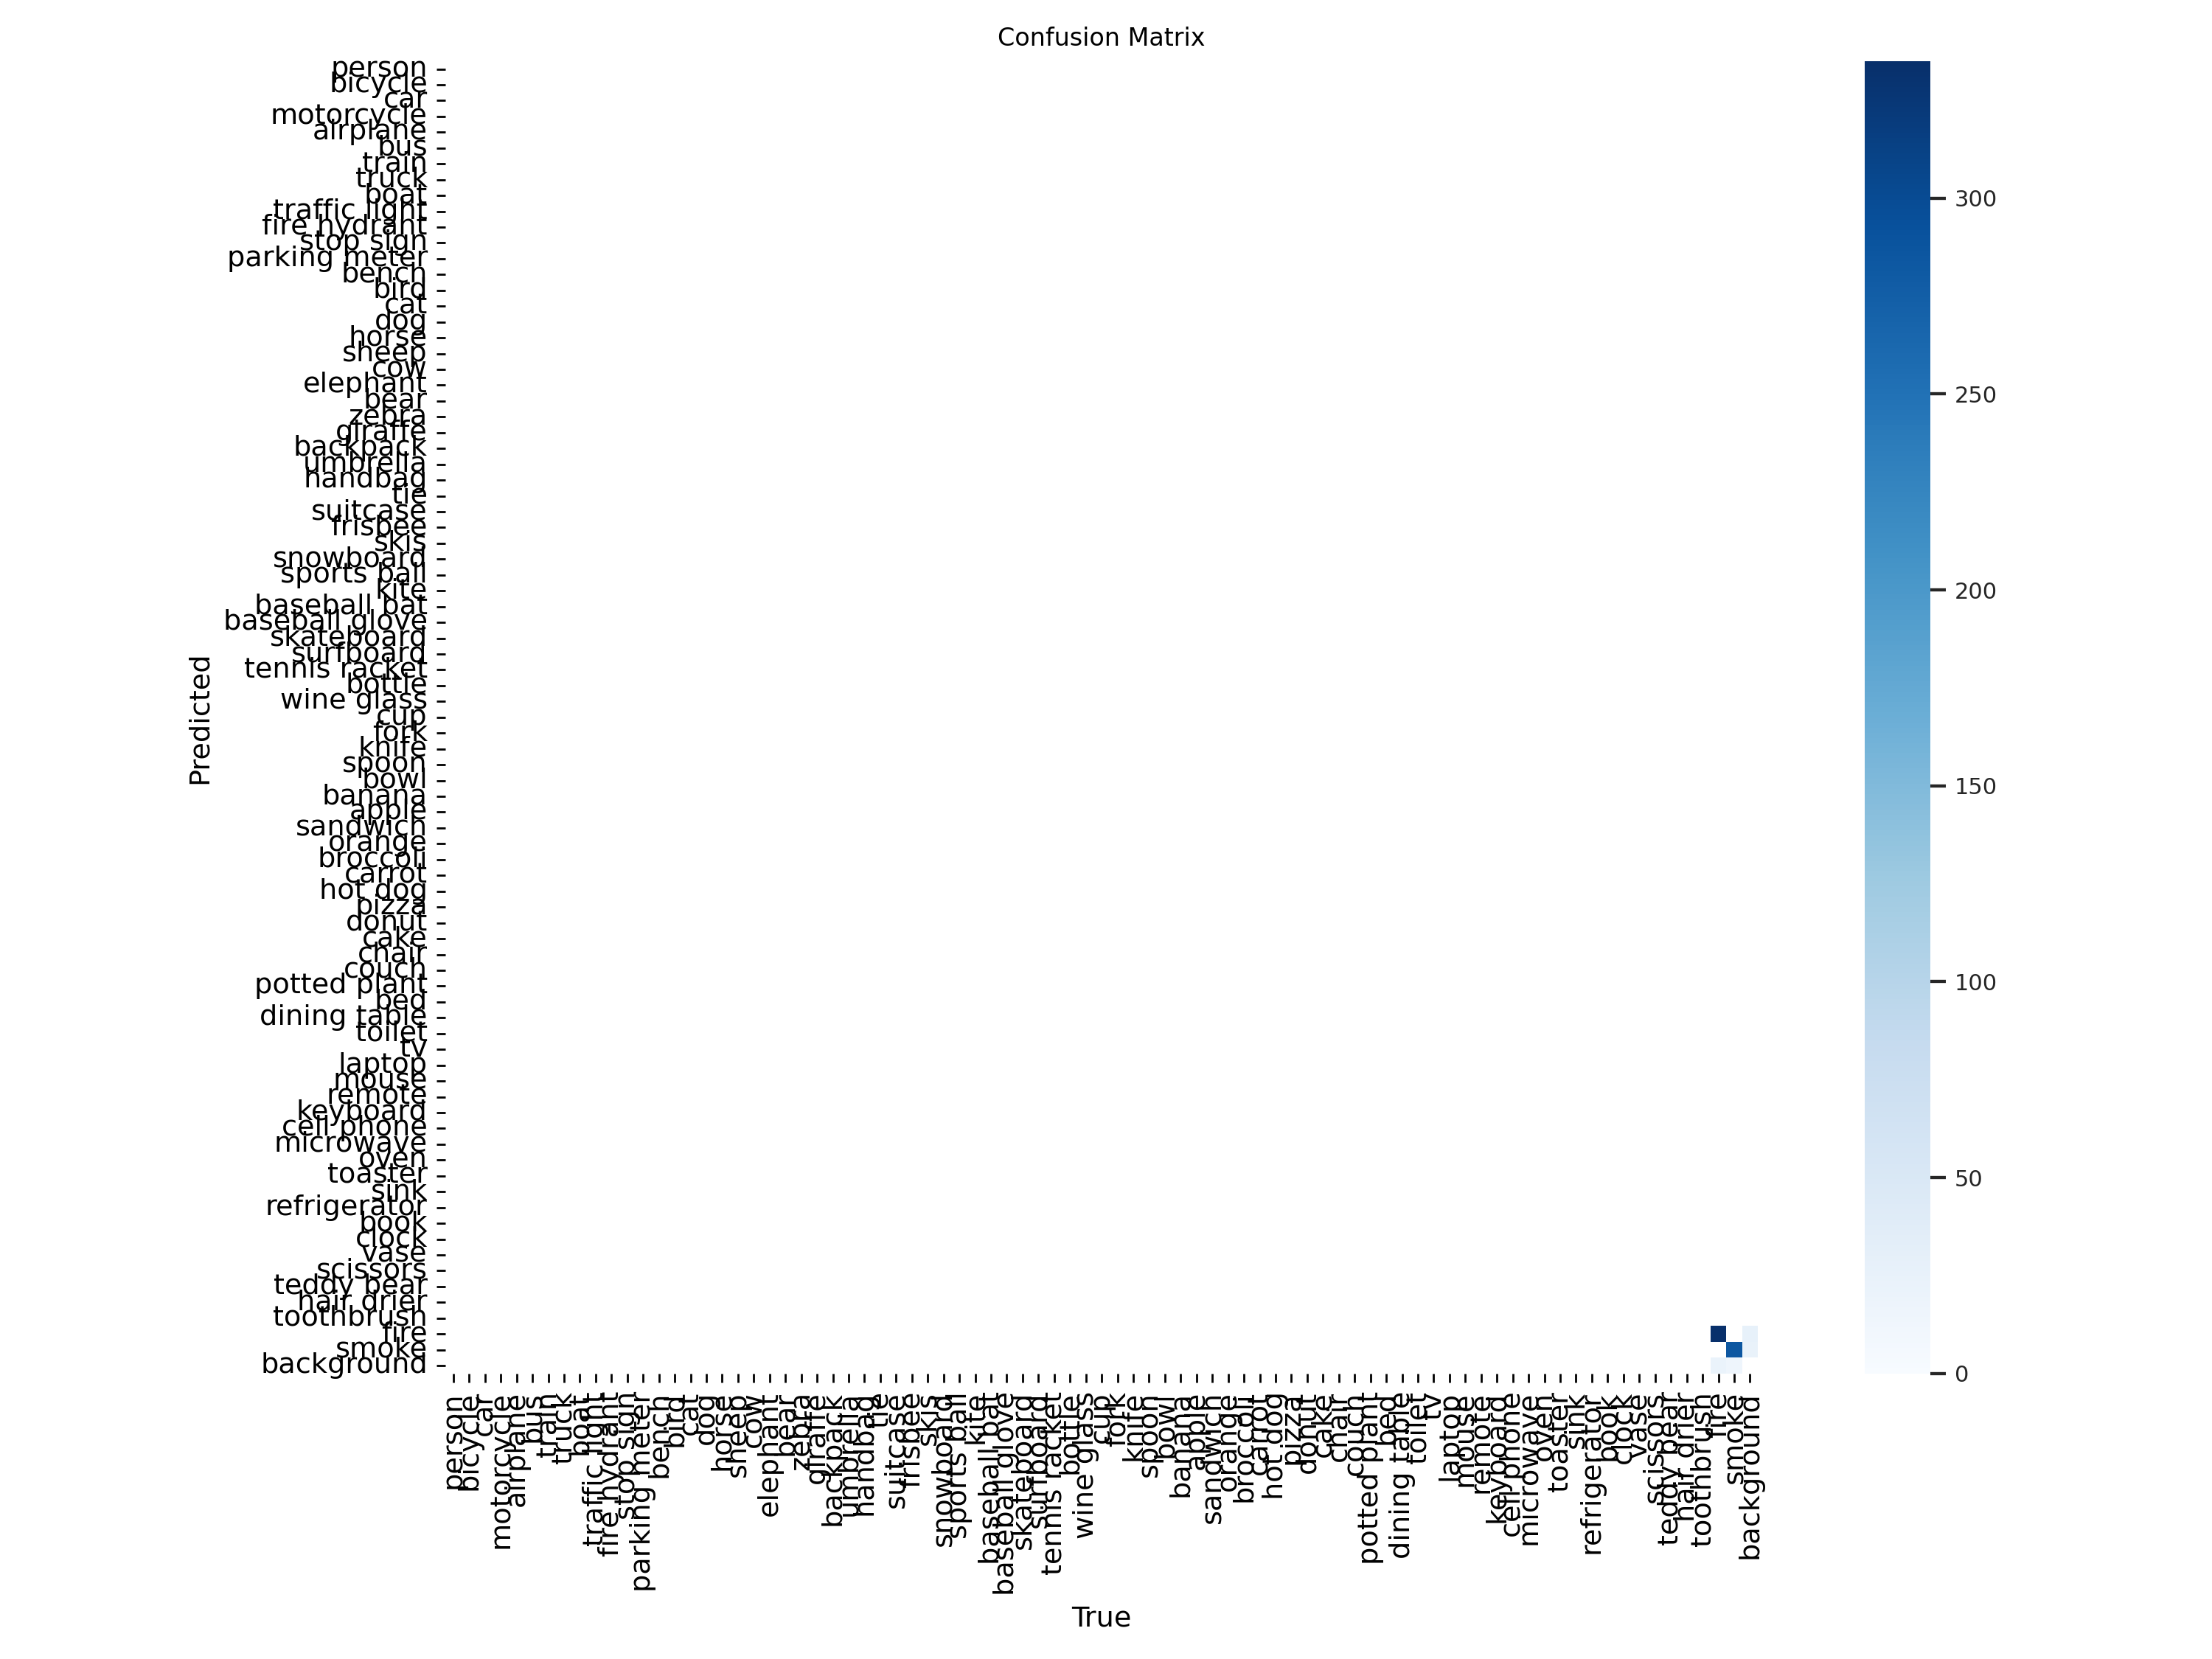

Displaying: results.png


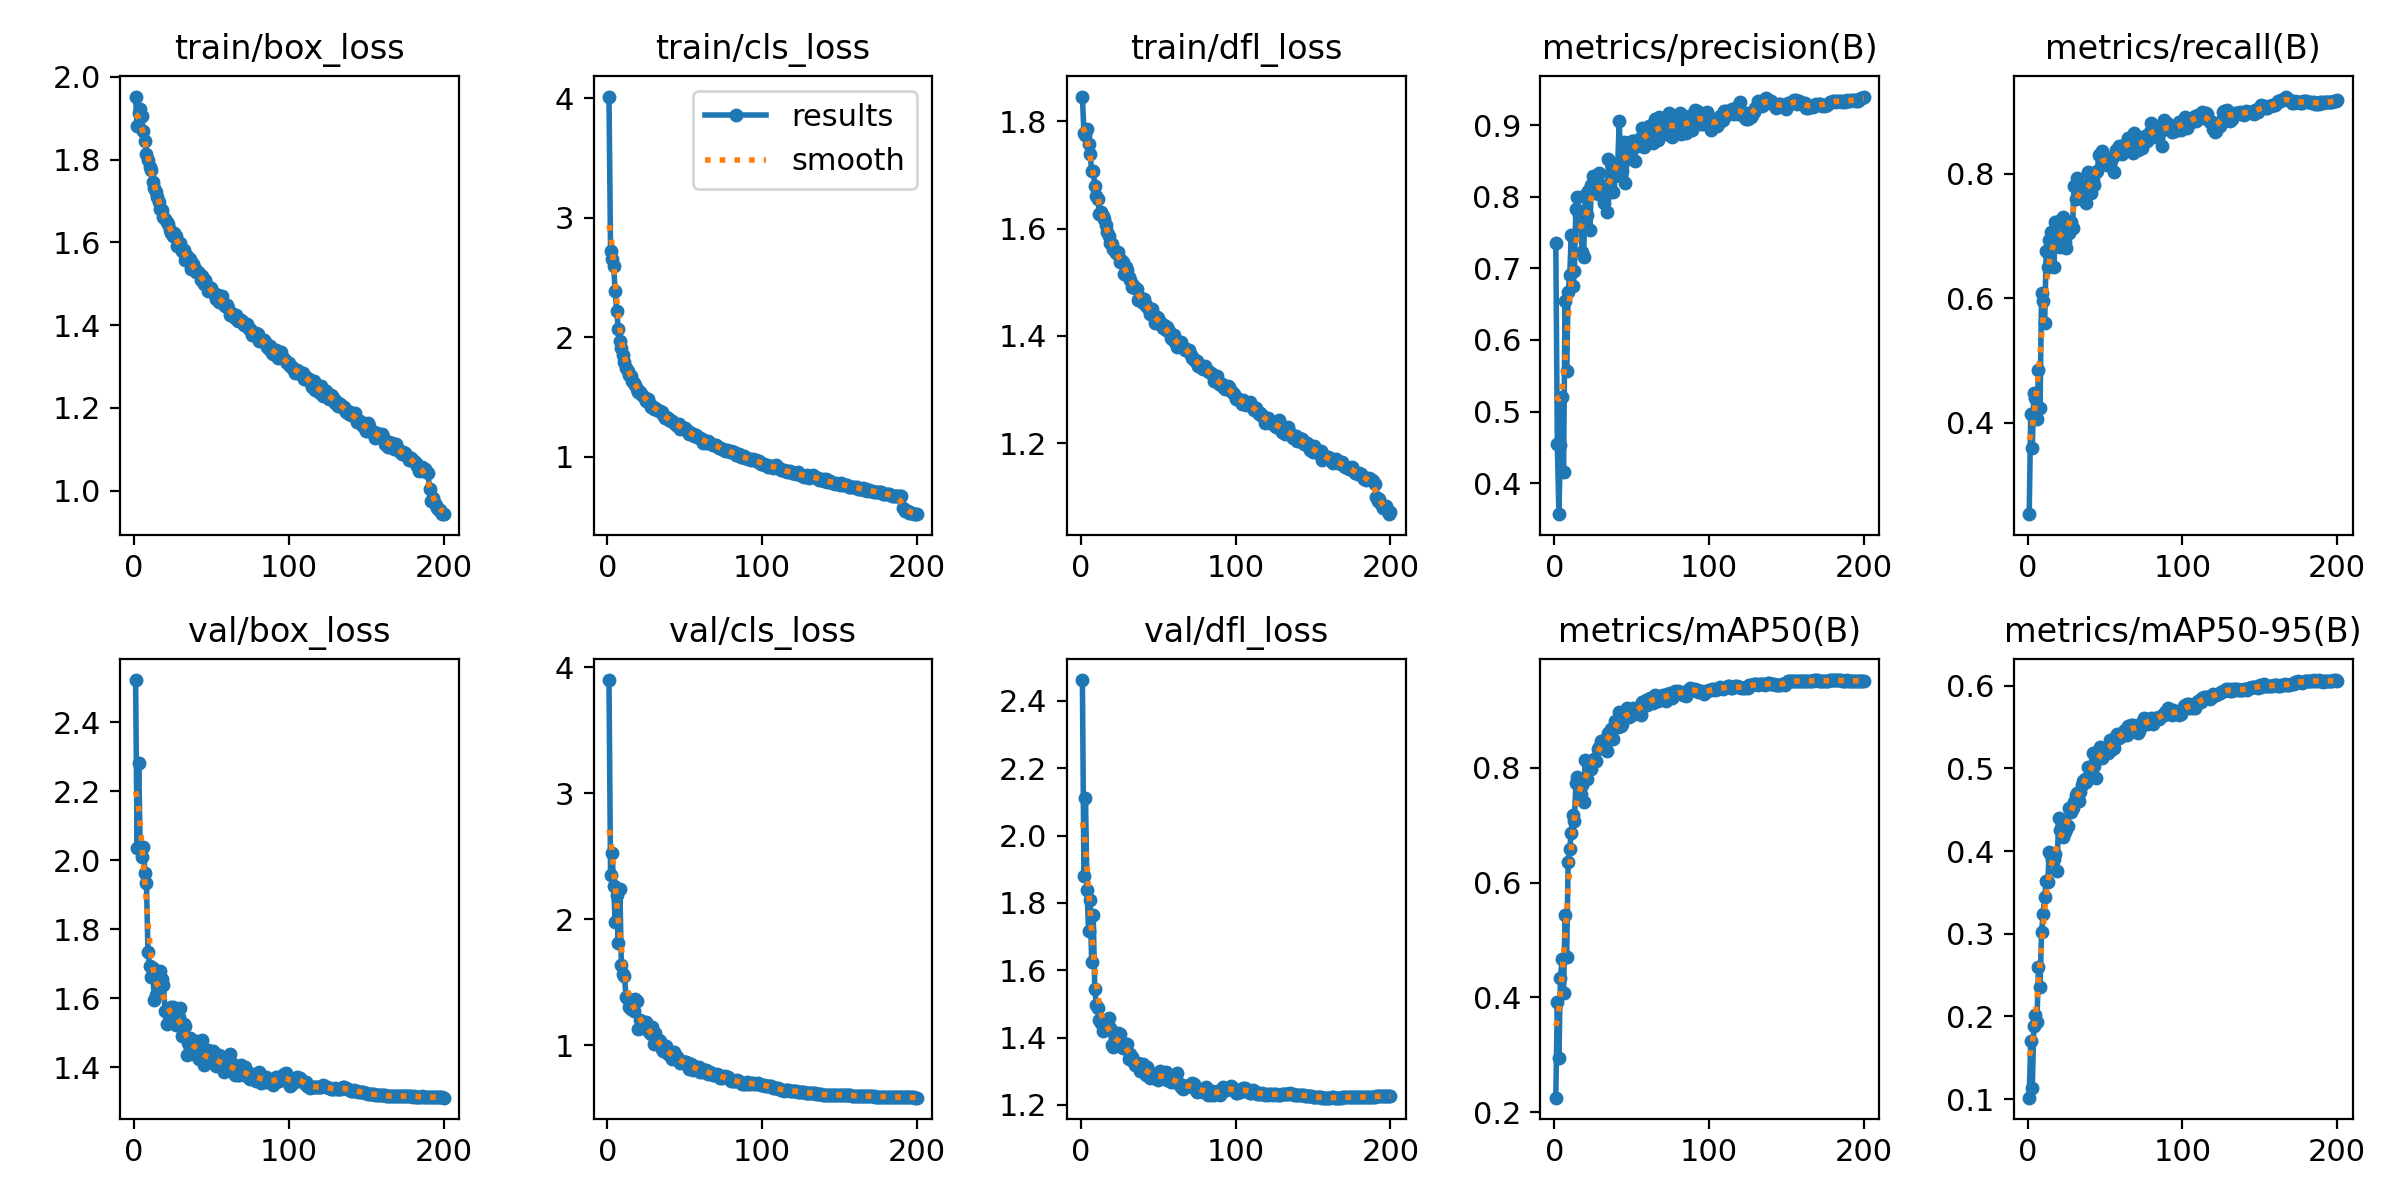

In [16]:
image_dir = '/kaggle/working/runs/detect/train'  # Adjust path if needed

for filename in os.listdir(image_dir):
    if filename.endswith(('.png')):  # Add other image extensions if needed
        image_path = os.path.join(image_dir, filename)
        print(f"Displaying: {filename}")
        display(Image(filename=image_path))

DataFrame Columns (after stripping whitespace): ['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']

DataFrame Head:
    epoch  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1          1.9527          4.0145          1.8460   
1      2          1.8803          2.7230          1.7784   
2      3          1.9128          2.6562          1.7746   
3      4          1.9222          2.5965          1.7846   
4      5          1.9049          2.3843          1.7573   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.73587            0.25350           0.22524   
1               0.45436            0.41508           0.39116   
2               0.35675            0.36021           0.29449   
3               0.45325            0.44804           0.43298   
4               0.51980

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

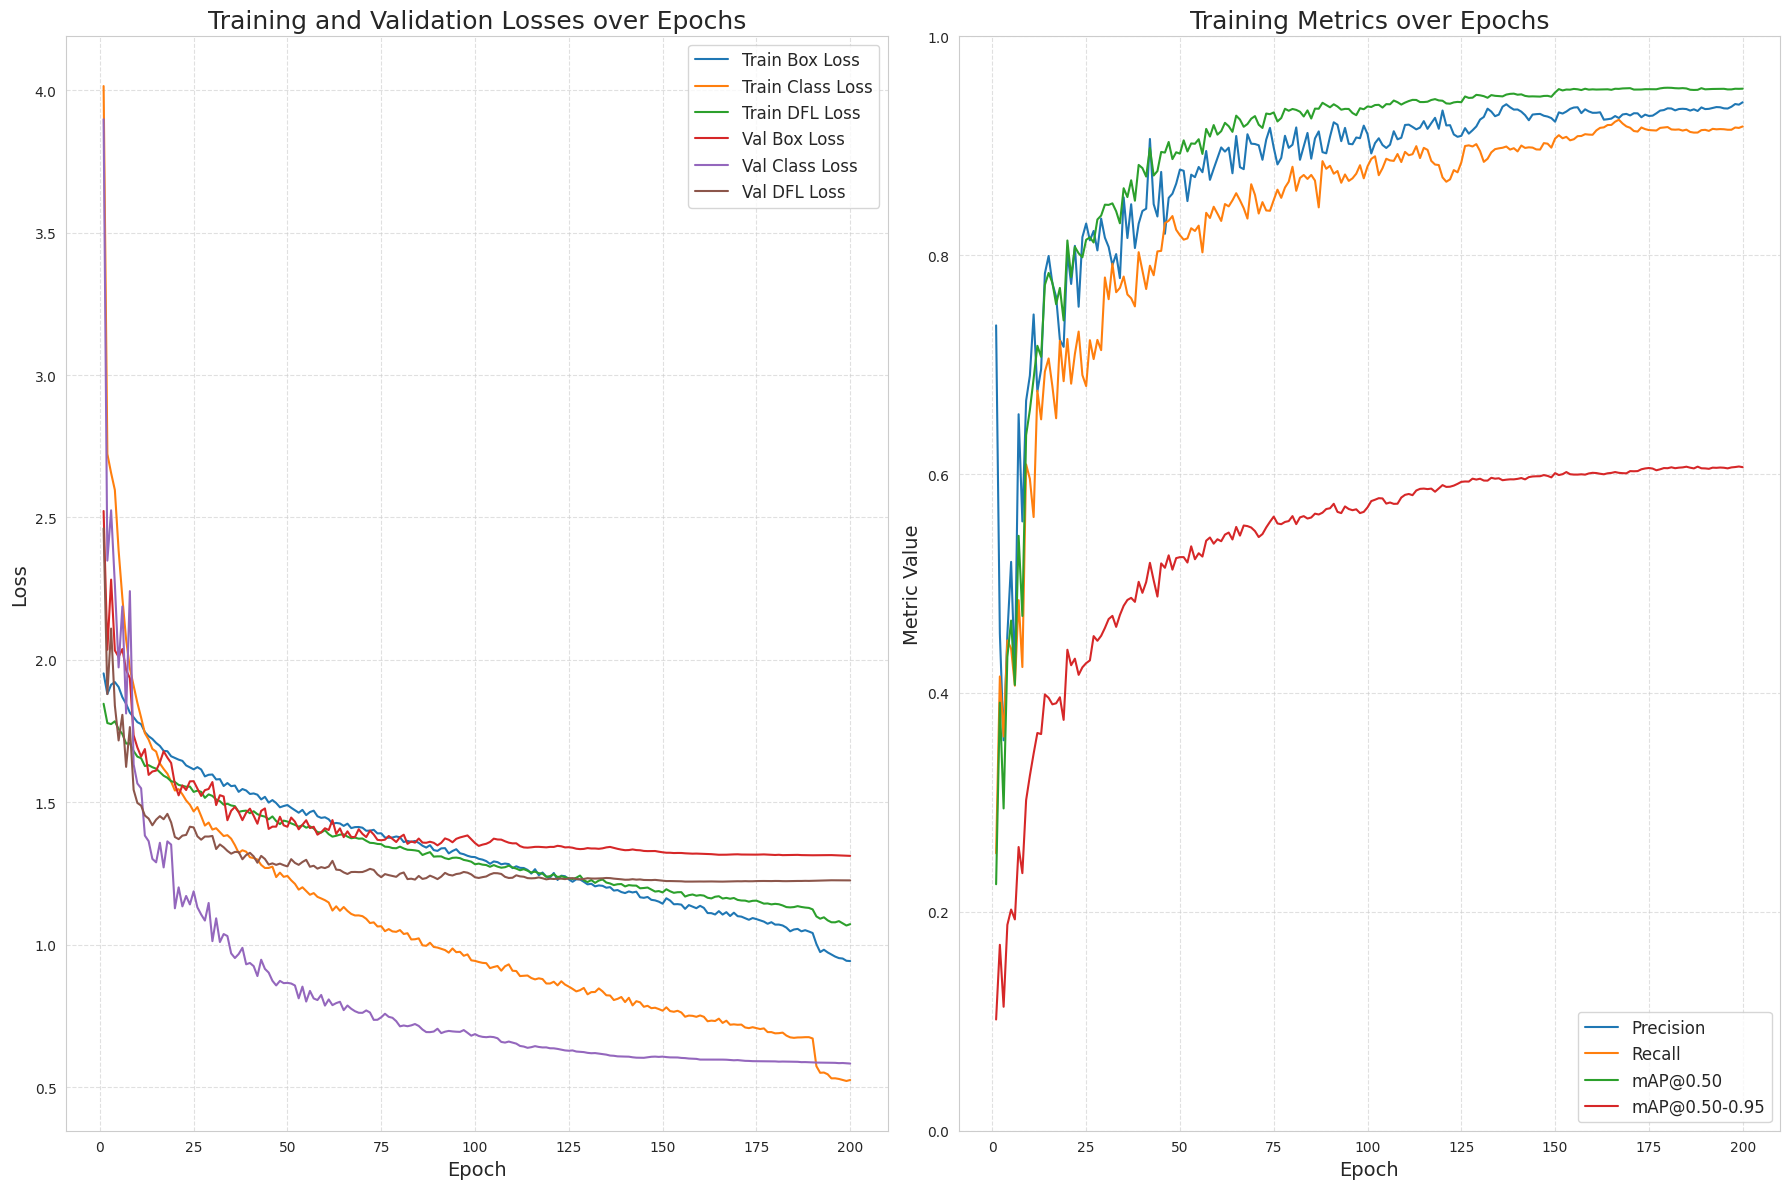

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_csv_path = '/kaggle/working/runs/detect/train/results.csv'

if not os.path.exists(results_csv_path):
    print(f"Error: results.csv not found at {results_csv_path}")
else:
    try:
        df = pd.read_csv(results_csv_path, comment='#', sep=',')
        df.columns = df.columns.str.strip()

        print("DataFrame Columns (after stripping whitespace):", df.columns.tolist())
        print("\nDataFrame Head:\n", df.head())
        if 'epoch' in df.columns:
             df['epoch'] = pd.to_numeric(df['epoch'], errors='coerce')
             df.dropna(subset=['epoch'], inplace=True)
             df['epoch'] = df['epoch'].astype(int)
        else:
             print("\nError: 'epoch' column not found after stripping whitespace. Please check the original column names.")


        sns.set_style("whitegrid")
        plt.figure(figsize=(18, 12))
        plt.subplot(1, 2, 1)
        loss_cols = {
            'train/box_loss': 'Train Box Loss',
            'train/cls_loss': 'Train Class Loss',
            'train/dfl_loss': 'Train DFL Loss',
            'val/box_loss': 'Val Box Loss',
            'val/cls_loss': 'Val Class Loss',
            'val/dfl_loss': 'Val DFL Loss'
        }

        for col, label in loss_cols.items():
            if col in df.columns:
                sns.lineplot(data=df, x='epoch', y=col, label=label)

        plt.title('Training and Validation Losses over Epochs', fontsize=18)
        plt.xlabel('Epoch', fontsize=14)
        plt.ylabel('Loss', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.6)


        # --- Plotting Metrics ---
        plt.subplot(1, 2, 2)
        metric_cols = {
            'metrics/precision(B)': 'Precision',
            'metrics/recall(B)': 'Recall',
            'metrics/mAP50(B)': 'mAP@0.50',
            'metrics/mAP50-95(B)': 'mAP@0.50-0.95'
        }

        for col, label in metric_cols.items():
             if col in df.columns:
                 sns.lineplot(data=df, x='epoch', y=col, label=label)


        plt.title('Training Metrics over Epochs', fontsize=18)
        plt.xlabel('Epoch', fontsize=14)
        plt.ylabel('Metric Value', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.ylim(0, 1)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred while reading or plotting the CSV: {e}")

In [18]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/kaggle/working/FireSmokeDetection-3/test/images

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3169706 parameters, 0 gradients, 8.8 GFLOPs

image 1/200 /kaggle/working/FireSmokeDetection-3/test/images/Img_1029_jpg.rf.8f701944928680d66dbcefebf3721ee1.jpg: 640x640 1 fire, 7.8ms
image 2/200 /kaggle/working/FireSmokeDetection-3/test/images/Img_1047_jpg.rf.1148bc422bdb75724b55b0fbae3f4979.jpg: 640x640 1 fire, 7.9ms
image 3/200 /kaggle/working/FireSmokeDetection-3/test/images/Img_1052_jpg.rf.6a6217eb4fe2c4c94a2f1024bec736d6.jpg: 640x640 1 fire, 7.8ms
image 4/200 /kaggle/working/FireSmokeDetection-3/test/images/Img_1065_jpg.rf.c6557fcb0b6cf910b3d82f412097cff0.jpg: 640x640 1 fire, 7.8ms
image 5/200 /kaggle/working/FireSmokeDetection-3/test/images/Img_1074_jpg.rf.0bbb8cd05154dae53c04a0ffb78615ce.jpg: 640x640 1 fire, 7.8ms
image 6/200 /kaggle/working/FireSmokeDetection-3/test/images/Img_107_jpg.rf.58ca7f9ccc7f269a62d593b9eec7484e.jpg: 640x640 1 fire, 7.9ms
image 7/200 /kagg

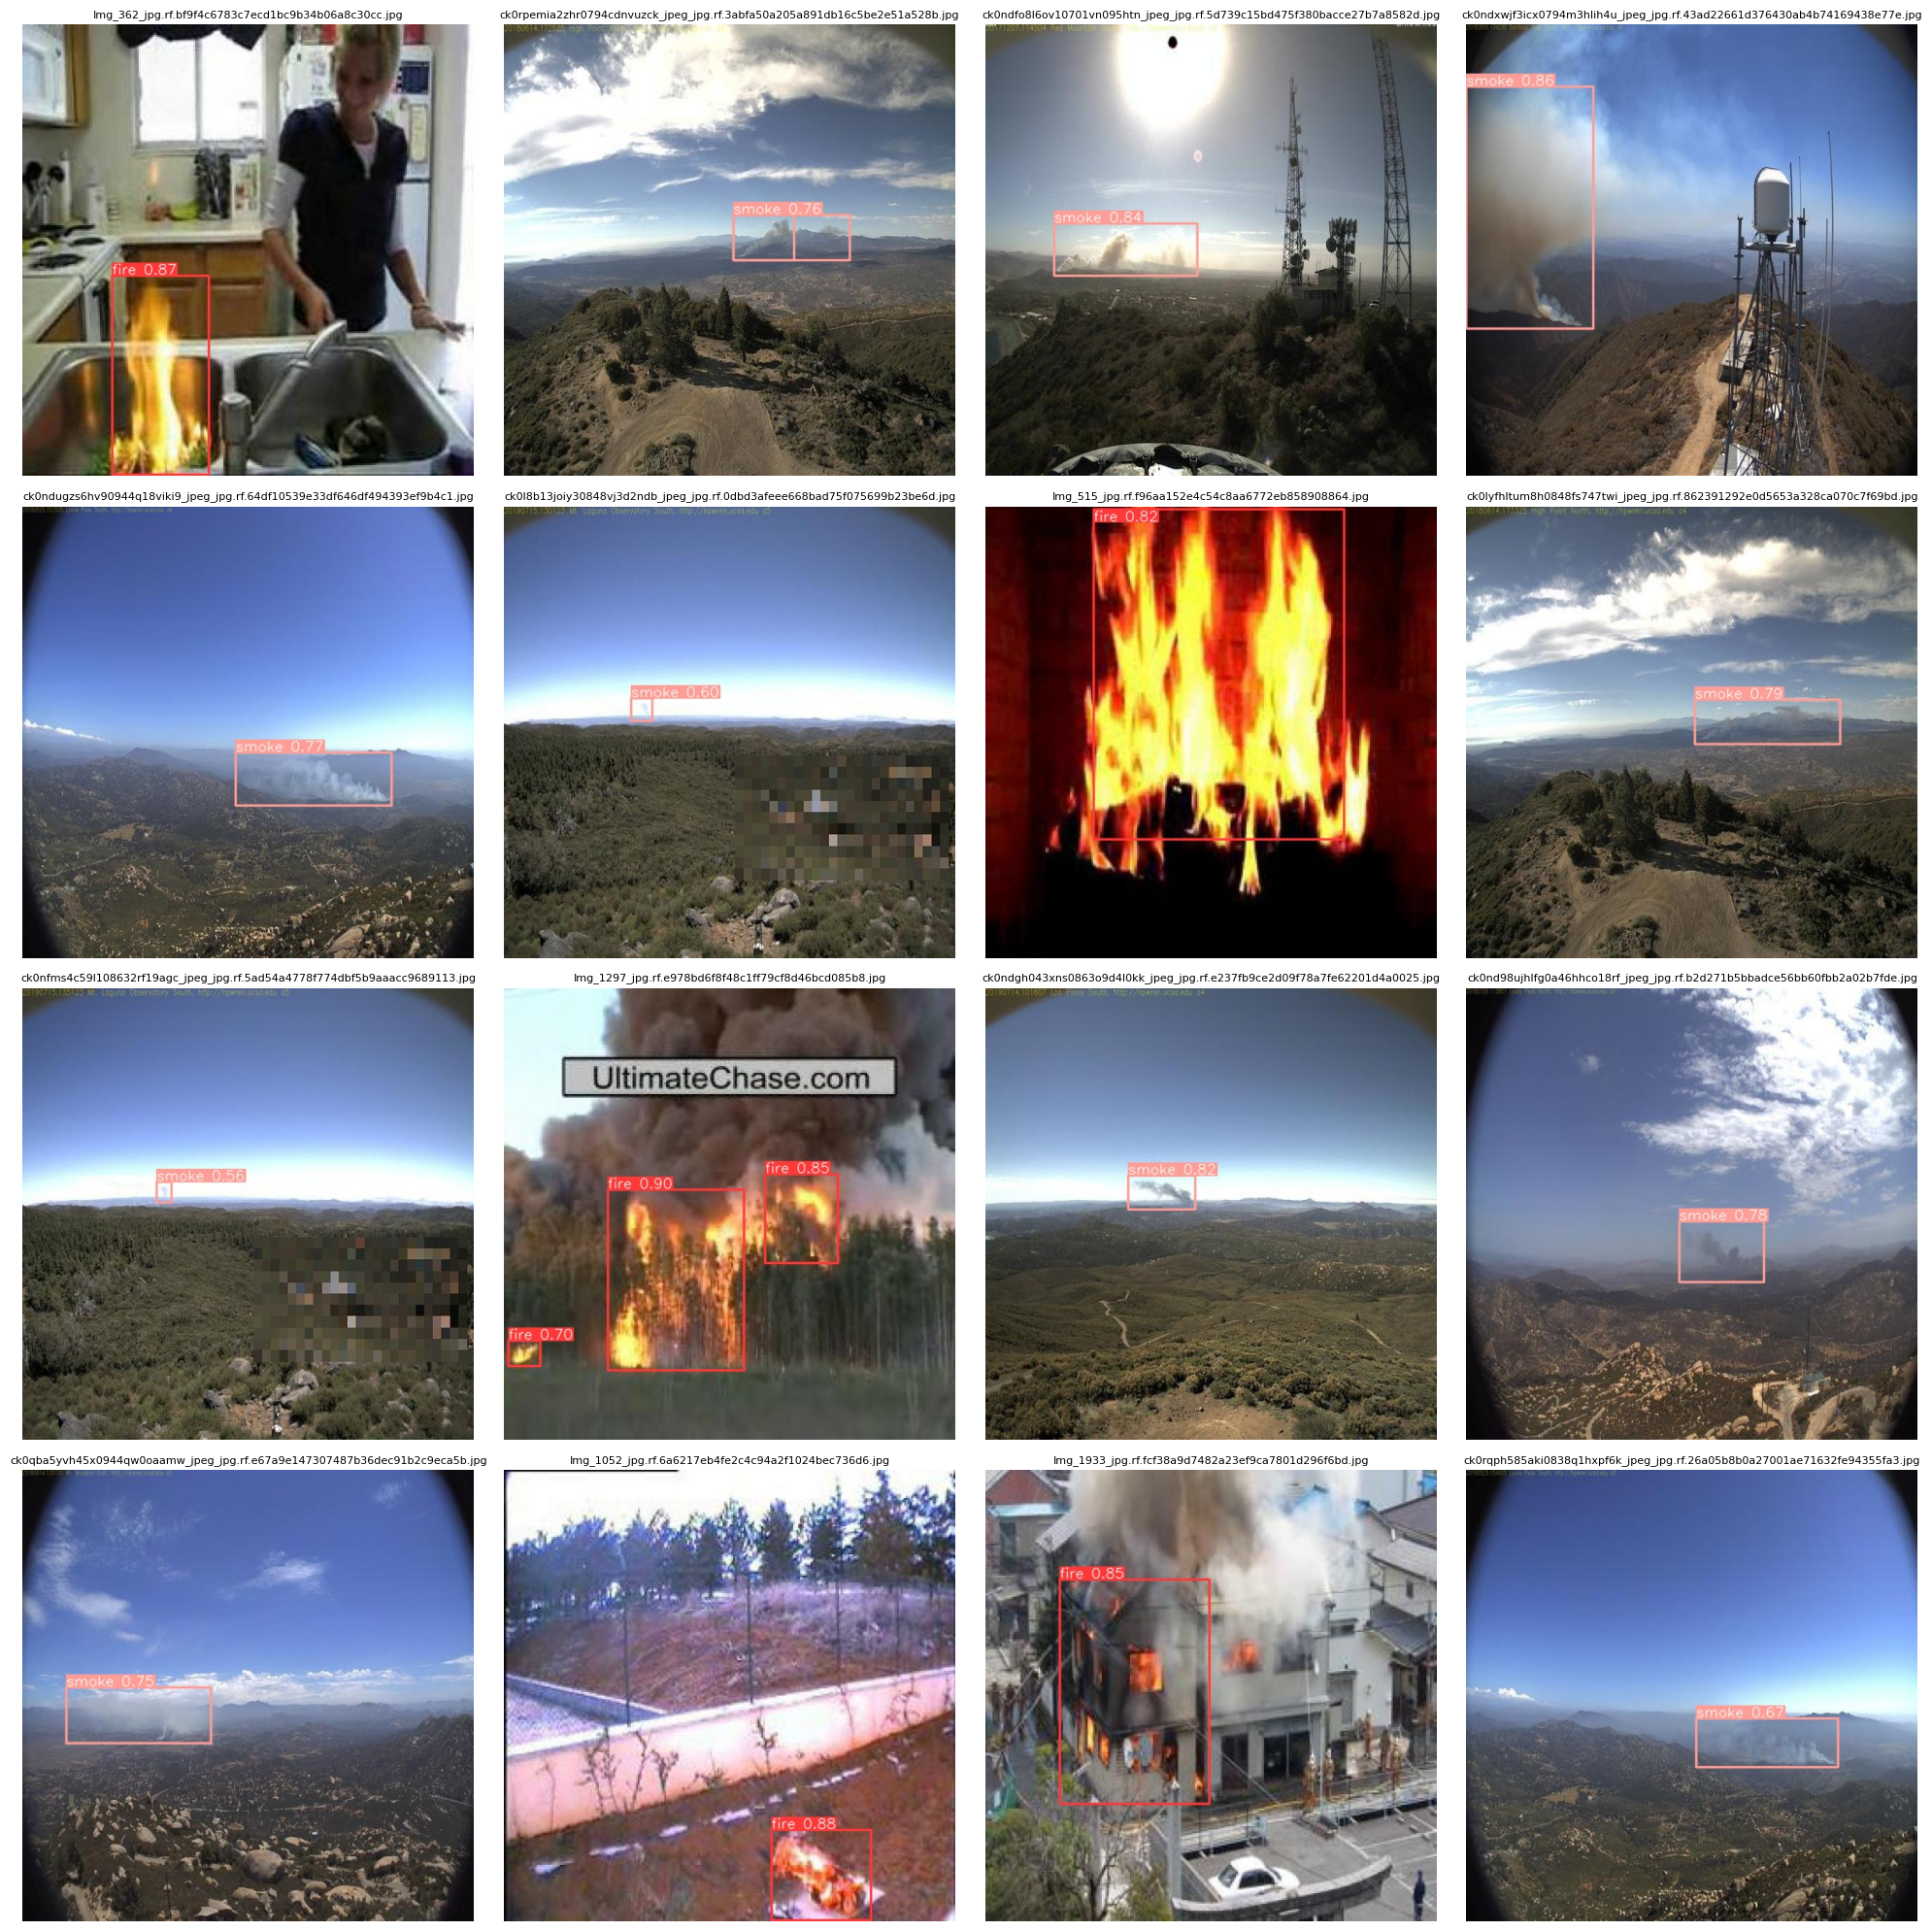

In [19]:
import matplotlib.pyplot as plt
import cv2
import os

# Path to the prediction results
prediction_dir = 'runs/detect/predict2'

# Get all image files from the prediction directory
predicted_files = [f for f in os.listdir(prediction_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Limit to 64 images for 8x8 grid
num_images = min(len(predicted_files), 16)
grid_size = 4

plt.figure(figsize=(20, 20))  # Set a large figure size

for idx in range(num_images):
    img_path = os.path.join(prediction_dir, predicted_files[idx])
    
    # Read the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Add subplot to grid
    plt.subplot(grid_size, grid_size, idx + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(predicted_files[idx], fontsize=8)

plt.tight_layout()
plt.show()
